In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

## **Análise Exploratória**

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/FIAP/Data Science/Challenge - 2º Ano/Notebooks/Arquivos/Resultado - Base1.csv')

In [14]:
df.head(5)

,CD_CLIENTE,DATA_RECENTE,FREQUENCIA,MONETARIO,RECENCIA,R_SCORE,F_SCORE,M_SCORE,RFM_SCORE,SEGMENTO_RFM
0,99069,2023-06-06,0,8.120772e+03,776,3,1,3,313,Potencial para Retenção
1,99958,2016-04-07,0,1.634142e+06,3392,1,1,5,115,Adormecidos
2,99999,2023-01-02,0,4.271960e+01,931,3,1,1,311,Potencial para Retenção
3,CARAMU,2022-06-17,0,8.531457e+04,1130,2,1,5,215,Adormecidos
4,T00018,2015-09-02,0,2.051230e+02,3610,1,1,2,112,Perdidos


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10615 entries, 0 to 10614
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CD_CLIENTE    10615 non-null  object 
 1   DATA_RECENTE  10615 non-null  object 
 2   FREQUENCIA    10615 non-null  int64  
 3   MONETARIO     10615 non-null  float64
 4   RECENCIA      10615 non-null  int64  
 5   R_SCORE       10615 non-null  int64  
 6   F_SCORE       10615 non-null  int64  
 7   M_SCORE       10615 non-null  int64  
 8   RFM_SCORE     10615 non-null  int64  
 9   SEGMENTO_RFM  10615 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 829.4+ KB


In [16]:
df.describe()

,FREQUENCIA,MONETARIO,RECENCIA,R_SCORE,F_SCORE,M_SCORE,RFM_SCORE
count,10615.000000,1.061500e+04,10615.000000,10615.000000,10615.00000,10615.00000,10615.000000
mean,38.356854,7.013173e+04,1155.917946,3.002261,3.00000,3.00000,333.226095
std,263.195849,7.262804e+05,1246.354498,1.416009,1.41428,1.41428,153.851639
min,0.000000,4.203857e-03,119.000000,1.000000,1.00000,1.00000,111.000000
25%,0.000000,3.489706e+02,292.000000,2.000000,2.00000,2.00000,221.000000
50%,0.000000,5.402932e+03,696.000000,3.000000,3.00000,3.00000,325.000000
75%,18.000000,3.328276e+04,1476.000000,4.000000,4.00000,4.00000,454.000000
max,21780.000000,4.006052e+07,12746.000000,5.000000,5.00000,5.00000,555.000000


## **Entendendo Comportamento dos Clusters**



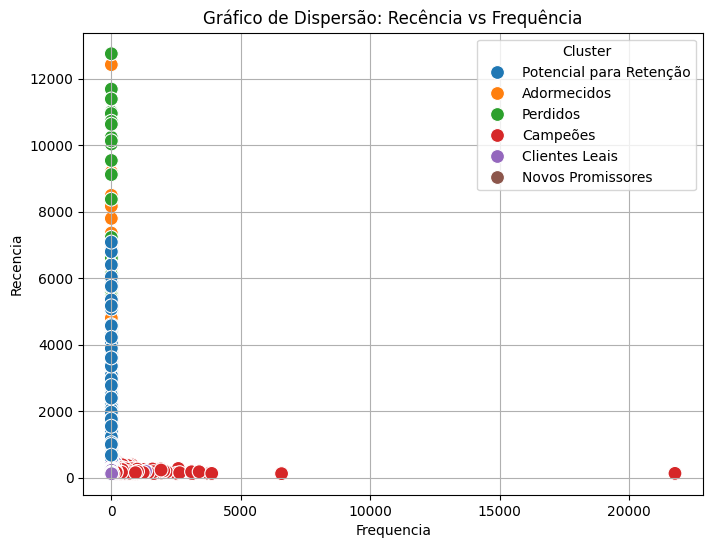

In [17]:
# Recencia vs. Frequência

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['FREQUENCIA'], y=df['RECENCIA'], hue='SEGMENTO_RFM', s=100)

plt.title('Gráfico de Dispersão: Recência vs Frequência')
plt.xlabel('Frequencia')
plt.ylabel('Recencia')
plt.legend(title='Cluster')

plt.grid(True)
plt.show()

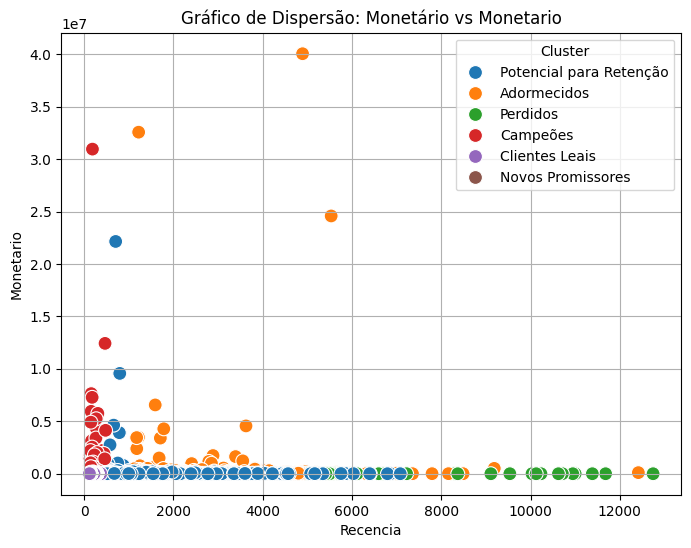

In [18]:
# Monetario vs. Recencia

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='RECENCIA', y='MONETARIO', hue='SEGMENTO_RFM', s=100)

plt.title('Gráfico de Dispersão: Monetário vs Monetario')
plt.xlabel('Recencia')
plt.ylabel('Monetario')
plt.legend(title='Cluster')

plt.grid(True)
plt.show()

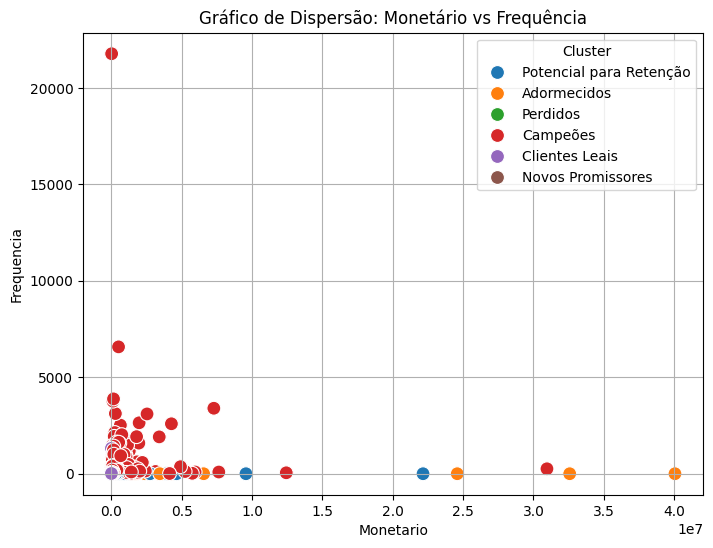

In [19]:
# Monetario vs. Frequência

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='MONETARIO', y='FREQUENCIA', hue='SEGMENTO_RFM', s=100)

plt.title('Gráfico de Dispersão: Monetário vs Frequência')
plt.xlabel('Monetario')
plt.ylabel('Frequencia')
plt.legend(title='Cluster')

plt.grid(True)

plt.show()

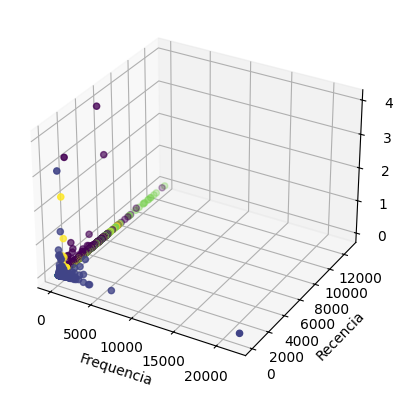

In [20]:
encoder = LabelEncoder()
categorias_codificadas = encoder.fit_transform(df['SEGMENTO_RFM'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dispersão
ax.scatter3D(df['FREQUENCIA'], df['RECENCIA'], df['MONETARIO'], c=categorias_codificadas, cmap='viridis')

ax.set_xlabel('Frequencia')
ax.set_ylabel('Recencia')
ax.set_zlabel('Monetario')

plt.show()

## **Dendograma**

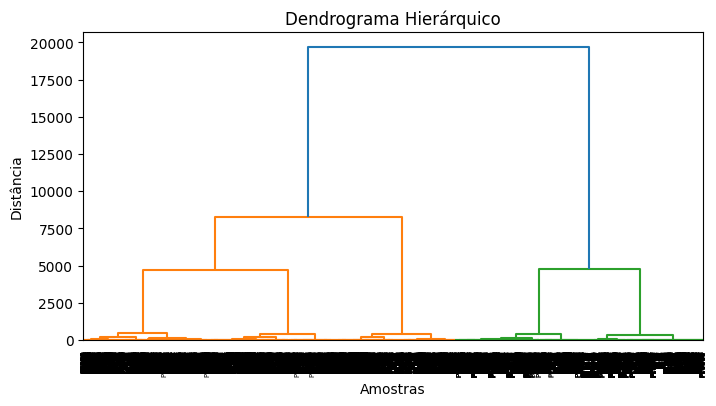

In [21]:
X = df['RFM_SCORE'].values.reshape(-1, 1)

linked = linkage(X, method='ward')  # Pode ser 'single', 'complete', 'average', 'ward'

# Plotando o dendrograma
plt.figure(figsize=(8, 4))
dendrogram(linked,
           orientation='top',
           labels=[f'P{i}' for i in range(len(X))],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

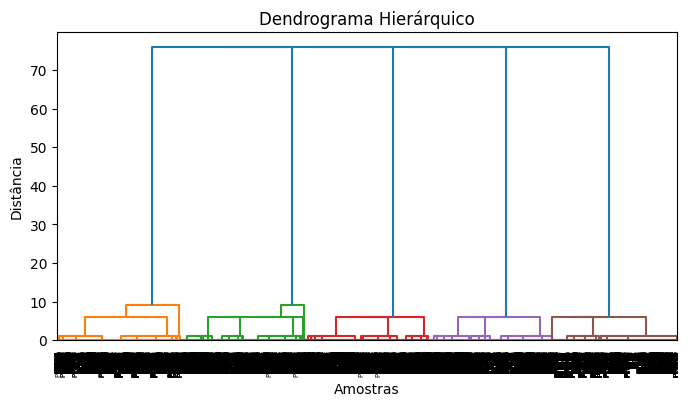

In [22]:
X = df['RFM_SCORE'].values.reshape(-1, 1)

linked = linkage(X, method='single')  # Pode ser 'single', 'complete', 'average', 'ward'

# Plotando o dendrograma
plt.figure(figsize=(8, 4))
dendrogram(linked,
           orientation='top',
           labels=[f'P{i}' for i in range(len(X))],
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

In [23]:
X = df[['R_SCORE', 'F_SCORE', 'M_SCORE']].values
X_scaled = StandardScaler().fit_transform(X)

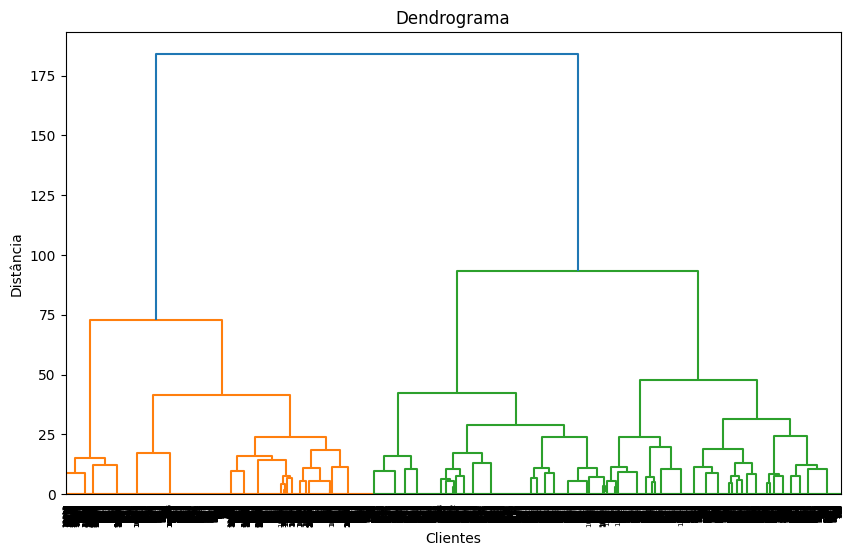

In [25]:
linked = linkage(X_scaled, method='ward')  # ou outro método: 'average', 'complete', etc.

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=df.index.tolist())
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distância")
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster

# Define número de clusters ou distância de corte
clusters = fcluster(linked, t=7, criterion='maxclust')  # 4 clusters
df['CLUSTER'] = clusters

In [27]:
df[['CLUSTER', 'SEGMENTO_RFM']]

,CLUSTER,SEGMENTO_RFM
0,7,Potencial para Retenção
1,7,Adormecidos
2,5,Potencial para Retenção
3,7,Adormecidos
4,4,Perdidos
...,...,...
10610,3,Campeões
10611,1,Clientes Leais
10612,1,Clientes Leais
10613,1,Clientes Leais


## **Os clusters estão muito agrupados, sem uma divisão aparente boa, ficando complicado a exploração para subclusters**

In [34]:
df = pd.read_csv('/content/drive/MyDrive/FIAP/Data Science/Challenge - 2º Ano/Notebooks/Arquivos/Resultado - Base1.csv')

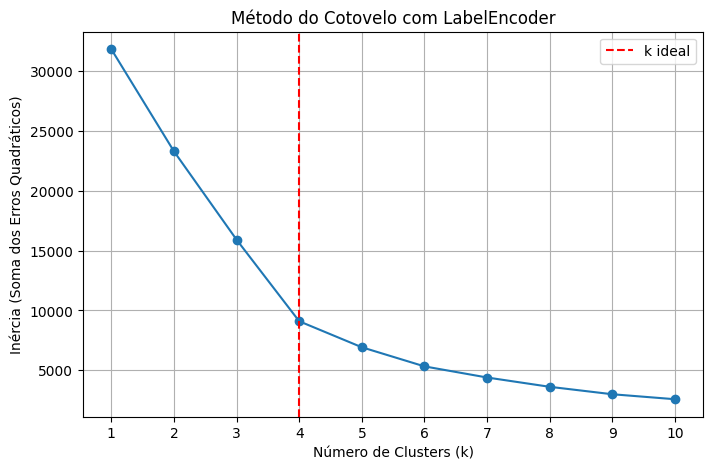

In [49]:
features = ['FREQUENCIA', 'MONETARIO', 'RECENCIA']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=4, color='red', linestyle='--', label='k ideal')  # <- Linha que você pediu
plt.title('Método do Cotovelo com LabelEncoder')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia (Soma dos Erros Quadráticos)')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()

In [57]:
X = features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

score = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score para 3 clusters: {score:.4f}')

# PCA para visualização em 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adicionar resultados ao dataframe
result = df.copy()
result['cluster'] = clusters
result['pca_x'] = X_pca[:, 0]
result['pca_y'] = X_pca[:, 1]

Silhouette Score para 3 clusters: 0.6569


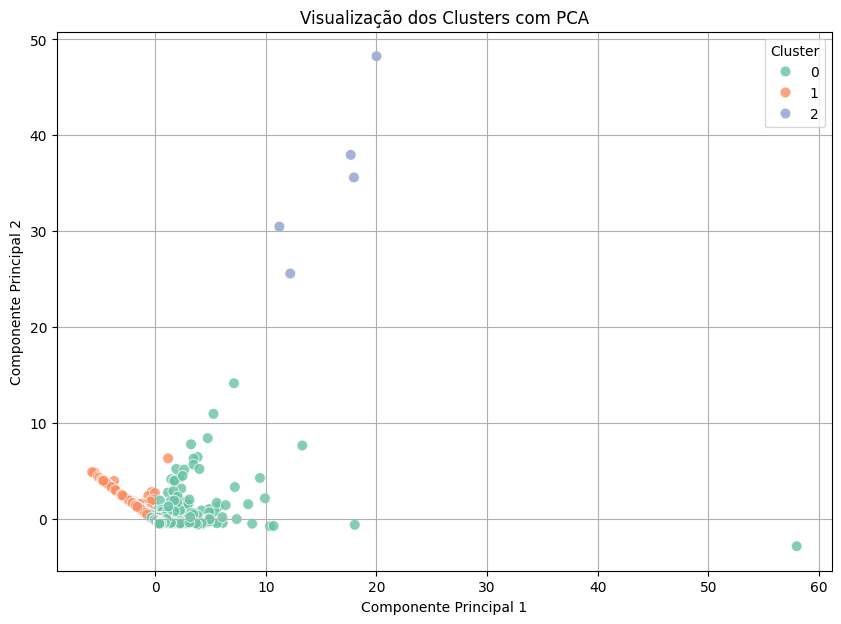

In [58]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=result,
    x='pca_x',
    y='pca_y',
    hue='cluster',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [59]:
result.head(5)

,CD_CLIENTE,DATA_RECENTE,FREQUENCIA,MONETARIO,RECENCIA,R_SCORE,F_SCORE,M_SCORE,RFM_SCORE,SEGMENTO_RFM,cluster,pca_x,pca_y
0,99069,2023-06-06,0,8.120772e+03,776,3,1,3,313,Potencial para Retenção,0,0.046695,-0.229850
1,99958,2016-04-07,0,1.634142e+06,3392,1,1,5,115,Adormecidos,1,-0.316796,2.780484
2,99999,2023-01-02,0,4.271960e+01,931,3,1,1,311,Potencial para Retenção,0,-0.032038,-0.173298
3,CARAMU,2022-06-17,0,8.531457e+04,1130,2,1,5,215,Adormecidos,0,-0.080733,0.010879
4,T00018,2015-09-02,0,2.051230e+02,3610,1,1,2,112,Perdidos,1,-1.316277,0.967191


In [67]:
cluster_0 = result[result['cluster'] == 0]
print(f'{cluster_0.describe()}')
print('\n\n ----------------------------------------------------------------------------------------- \n\n')
cluster_1 = result[result['cluster'] == 1]
print(f'{cluster_1.describe()}')
print('\n\n ----------------------------------------------------------------------------------------- \n\n')
cluster_2 = result[result['cluster'] == 2]
print(f'{cluster_2.describe()}')

         FREQUENCIA     MONETARIO     RECENCIA      R_SCORE      F_SCORE  \
count   8903.000000  8.903000e+03  8903.000000  8903.000000  8903.000000   
mean      45.703920  6.239483e+04   701.309783     3.386499     3.264405   
std      286.796297  3.111008e+05   523.032613     1.213599     1.360432   
min        0.000000  4.203857e-03   119.000000     1.000000     1.000000   
25%        0.000000  4.324676e+02   249.000000     2.000000     2.000000   
50%        0.000000  6.751155e+03   532.000000     3.000000     3.000000   
75%       27.000000  3.943653e+04  1090.000000     4.000000     4.000000   
max    21780.000000  1.243281e+07  2103.000000     5.000000     5.000000   

           M_SCORE    RFM_SCORE  cluster        pca_x        pca_y  
count  8903.000000  8903.000000   8903.0  8903.000000  8903.000000  
mean      3.078288   374.372234      0.0     0.233141    -0.203331  
std       1.427592   132.995639      0.0     0.881809     0.406155  
min       1.000000   111.000000      0.

In [75]:
eps=0.5
min_samples=5

X = features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples, )
clusters = dbscan.fit_predict(X_scaled)

# Redução para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Retornar DataFrame com resultado
result = df.copy()
result['cluster'] = clusters
result['pca_x'] = X_pca[:, 0]
result['pca_y'] = X_pca[:, 1]

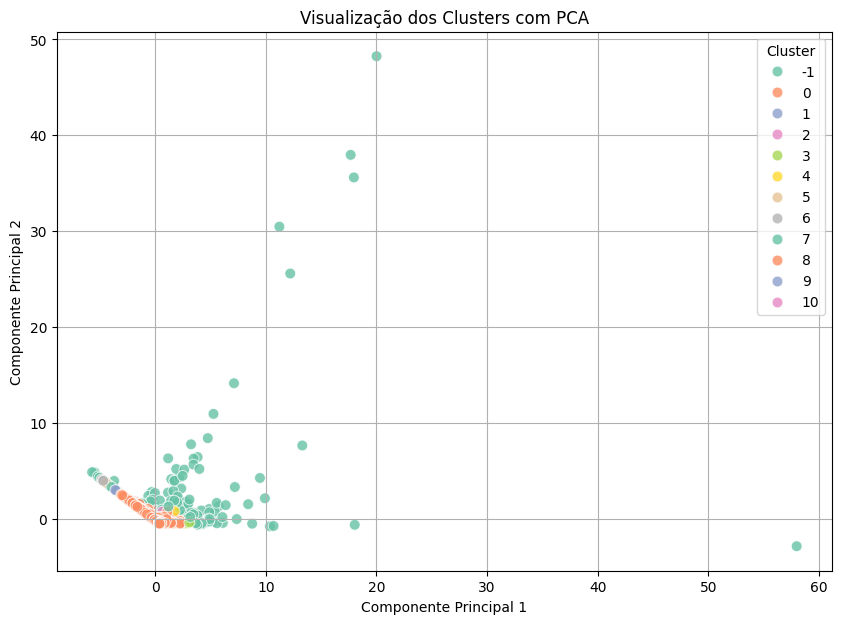

In [74]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=result,
    x='pca_x',
    y='pca_y',
    hue='cluster',
    palette='Set2',
    s=60,
    alpha=0.8
)
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()